## Conway's Game of Life 

https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life

The Game of Life, also known as Conway's Game of Life or simply Life, is a cellular automaton devised by the British mathematician John Horton Conway in 1970.[1] It is a zero-player game,[2][3] meaning that its evolution is determined by its initial state, requiring no further input. One interacts with the Game of Life by creating an initial configuration and observing how it evolves. It is Turing complete and can simulate a universal constructor or any other Turing machine.

#### The universe of the Game of Life is an infinite, two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead (or populated and unpopulated, respectively). Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

#### Any live cell with fewer than two live neighbours dies, as if by underpopulation.
#### Any live cell with two or three live neighbours lives on to the next generation.
#### Any live cell with more than three live neighbours dies, as if by overpopulation.
#### Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

In [2]:
#Imports and Installs
import numpy as np
import csv
import random
import time
import matplotlib.pyplot as plt
from IPython import display

In [6]:
# init grid

# Coordinates of Grid
grid_size = 40
x_cords = range(0,grid_size)
y_cords = range(0,grid_size)
Grid = np.zeros((len(x_cords),len(x_cords)))

In [7]:
#Starting Block // Seed
firstBlock_x, firstBlock_y = int(grid_size/2), int(grid_size/2)
Grid[firstBlock_x-1:firstBlock_x+1, firstBlock_y-1:firstBlock_y+1] = True



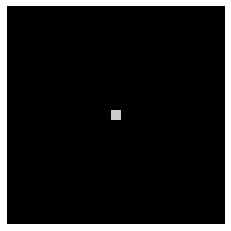

In [8]:
# Starting Seed
plt.imshow(Grid, cmap='nipy_spectral', interpolation='nearest')
plt.axis('off')
plt.show()
